In [1]:
from scprint import scPrint
from scdataloader import Preprocessor

from bengrn import BenGRN, get_sroy_gt
import scanpy as sc

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


2024-05-17 17:48:23,092:INFO - Downloading data from `https://omnipathdb.org/queries/enzsub?format=json`
2024-05-17 17:48:23,209:INFO - Downloading data from `https://omnipathdb.org/queries/interactions?format=json`
2024-05-17 17:48:23,303:INFO - Downloading data from `https://omnipathdb.org/queries/complexes?format=json`
2024-05-17 17:48:23,389:INFO - Downloading data from `https://omnipathdb.org/queries/annotations?format=json`
2024-05-17 17:48:23,485:INFO - Downloading data from `https://omnipathdb.org/queries/intercell?format=json`
2024-05-17 17:48:23,693:INFO - Downloading data from `https://omnipathdb.org/about?format=text`
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/chex/_src/pytypes.py:53: DeprecationWarning: jax.core.Shape is deprecated. Use Shape = Sequence[int | Any].
  Shape = jax.core

In [2]:
# '../../data/main/gene_embeddings.parquet')
model = scPrint.load_from_checkpoint(
    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt', precpt_gene_emb=None)

RuntimeError caught: scPrint is not attached to a `Trainer`.



In [3]:
preprocessor = Preprocessor(is_symbol=True, force_preprocess=True, skip_validate=True,
                            do_postp=False, min_valid_genes_id=5000, min_dataset_size=64)

NUM_GENES = 5000

# liu / full


In [4]:
preadata = get_sroy_gt(get="liu", species="human", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 72 renamining
filtered out 0 cells, 72 renamining
Removed 0 genes.
startin QC
Seeing 4 outliers (5.56% of total dataset):
done


(GRnnData object with n_obs × n_vars = 72 × 23153
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 10537 elements,
 33)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 34.79 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.03820859577621341 
recall:  0.8693361433087461 
random precision: 0.030952717468117723


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1142.14it/s]


Area Under Precision-Recall Curve (AUPRC):  0.04641220065075916
EPR: 2.1604944493351006


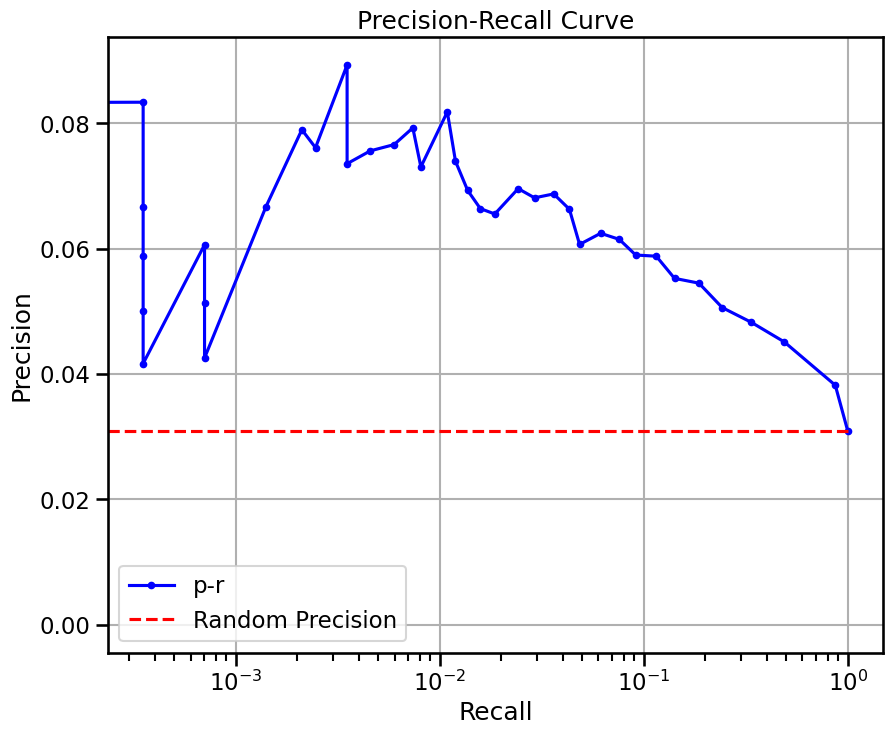

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 50.60 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.03318070210365651 
recall:  0.3512469265893923 
random precision: 0.030952717468117723


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1752.70it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0375706829975765
EPR: 2.188098253747528


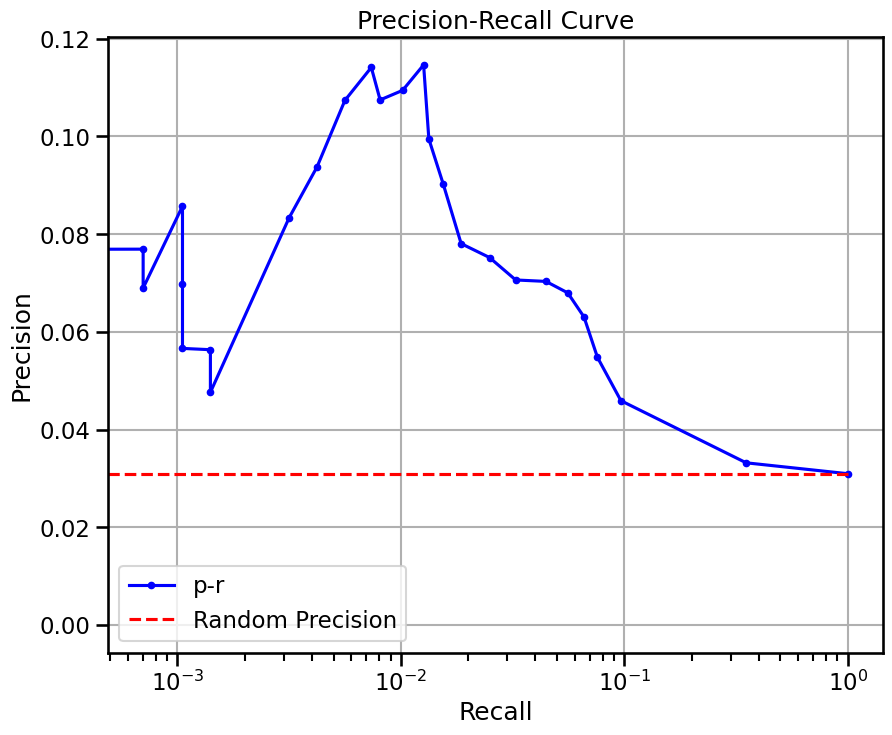

{'precision': 0.03318070210365651,
 'recall': 0.3512469265893923,
 'rand_precision': 0.030952717468117723,
 'auprc': 0.0375706829975765,
 'EPR': 2.188098253747528}

In [17]:
def test_genie3(madata):
    sc.pp.highly_variable_genes(
        adata, flavor="seurat_v3", n_top_genes=NUM_GENES)
    adata.var['ensembl_id'] = adata.var.index
    subadata = adata[:1024, adata.var.index.isin(
        model.genes) & adata.var.highly_variable]

    genie_grn = compute_genie3(subadata, nthreads=32,
                               regulators=adata.var[adata.var.isTF].index.tolist())
    genie_grn.var['symbol'] = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    genie_grn.var.index = genie_grn.var['symbol']
    BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)
    genie_grn = compute_genie3(subadata, nthreads=32)
    genie_grn.var['symbol'] = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    genie_grn.var.index = genie_grn.var['symbol']
    BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)


test(adata)

# liu / chip


In [18]:
preadata = get_sroy_gt(get="liu", species="human", gt="chip")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 72 renamining
filtered out 0 cells, 72 renamining
Removed 0 genes.
startin QC
Seeing 4 outliers (5.56% of total dataset):
done


(GRnnData object with n_obs × n_vars = 72 × 23153
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 435395 elements,
 90)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 35.59 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.265593852020917 
recall:  0.6385653754428211 
random precision: 0.27879699442263994


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
 48%|████▊     | 48/99 [00:00<00:00, 477.26it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 537.46it/s]


Area Under Precision-Recall Curve (AUPRC):  0.2905960409052194
EPR: 1.1896597313469794


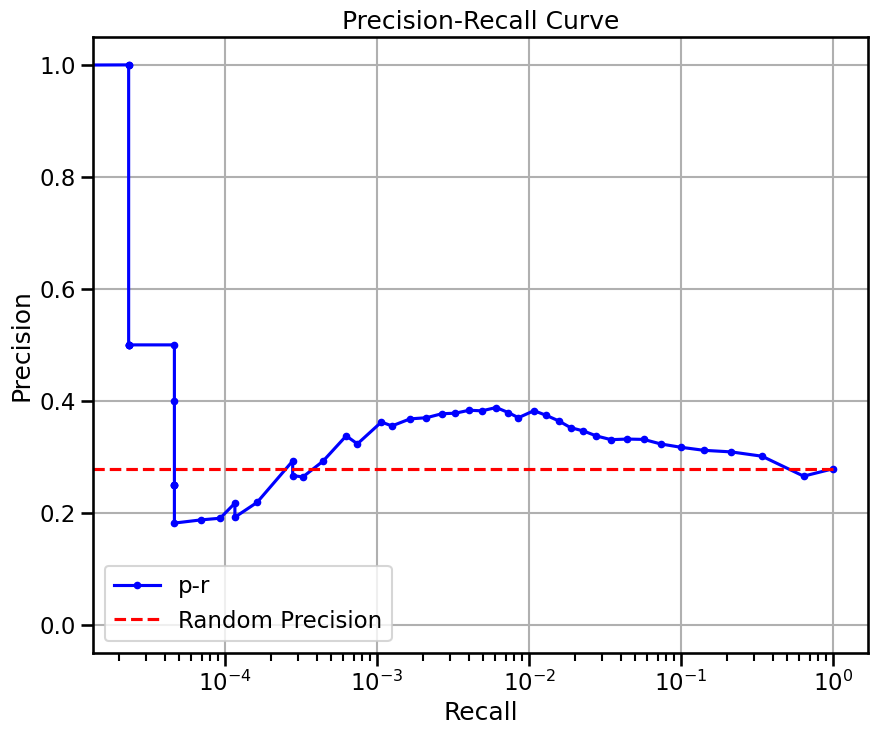

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",
/home/ml4ig1/min

Elapsed time: 72.45 seconds
precision:  0.32936464391528586 
recall:  0.4169811757623469 
random precision: 0.27879699442263994


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 557.73it/s]


Area Under Precision-Recall Curve (AUPRC):  0.3119995819856768
EPR: 1.4056389855148568


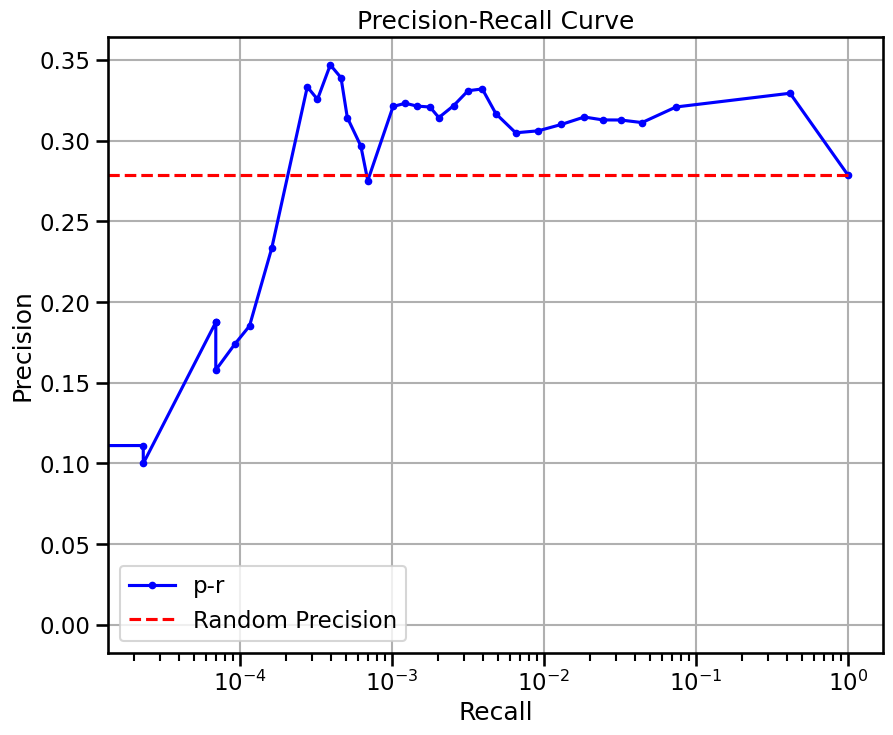

{'precision': 0.32936464391528586,
 'recall': 0.4169811757623469,
 'rand_precision': 0.27879699442263994,
 'auprc': 0.3119995819856768,
 'EPR': 1.4056389855148568}

In [20]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=NUM_GENES)
adata.var['ensembl_id'] = adata.var.index
subadata = adata[:1024, adata.var.index.isin(
    model.genes) & adata.var.highly_variable]

genie_grn = compute_genie3(subadata, nthreads=32,
                           regulators=adata.var[adata.var.isTF].index.tolist())
genie_grn.var['symbol'] = make_index_unique(
    genie_grn.var['symbol'].astype(str))
genie_grn.var.index = genie_grn.var['symbol']
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)
genie_grn = compute_genie3(subadata, nthreads=32)
genie_grn.var['symbol'] = make_index_unique(
    genie_grn.var['symbol'].astype(str))
genie_grn.var.index = genie_grn.var['symbol']
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)

## liu / ko


In [21]:
preadata = get_sroy_gt(get="liu", species="human", gt="ko")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 72 renamining
filtered out 0 cells, 72 renamining
Removed 0 genes.
startin QC
Seeing 4 outliers (5.56% of total dataset):
done


(GRnnData object with n_obs × n_vars = 72 × 23153
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 108194 elements,
 157)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 40.61 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.0885282626378462 
recall:  0.7321753515301902 
random precision: 0.05675949747422584


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 672.54it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0925638897450466
EPR: 2.1706857537214006


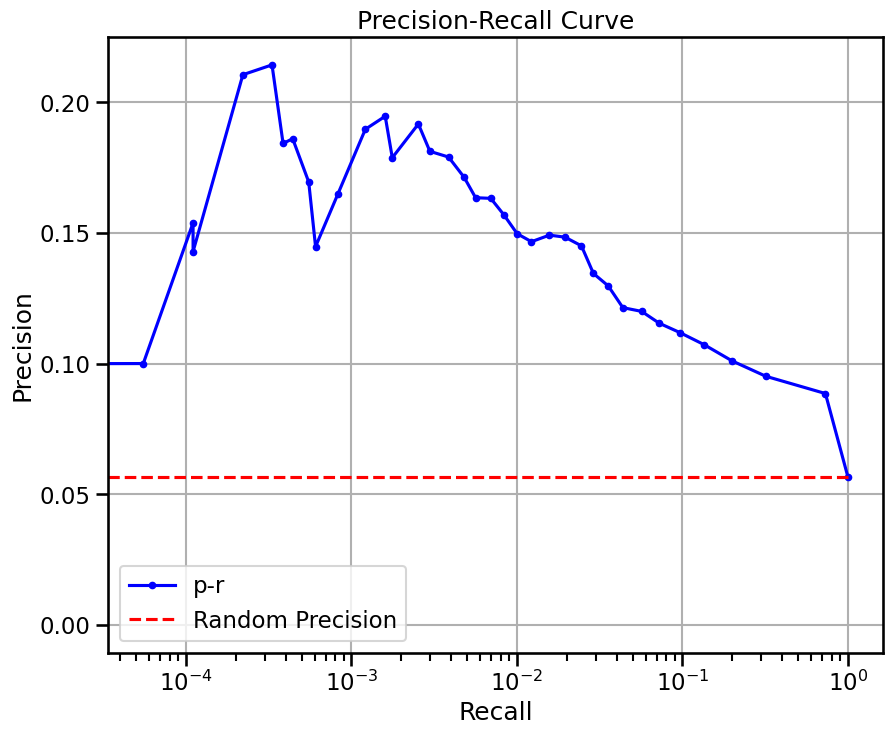

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 51.43 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.04679072544531794 
recall:  0.25927763992280123 
random precision: 0.05675949747422584


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 682.05it/s]


Area Under Precision-Recall Curve (AUPRC):  0.05451899379734963
EPR: 1.120179447134923


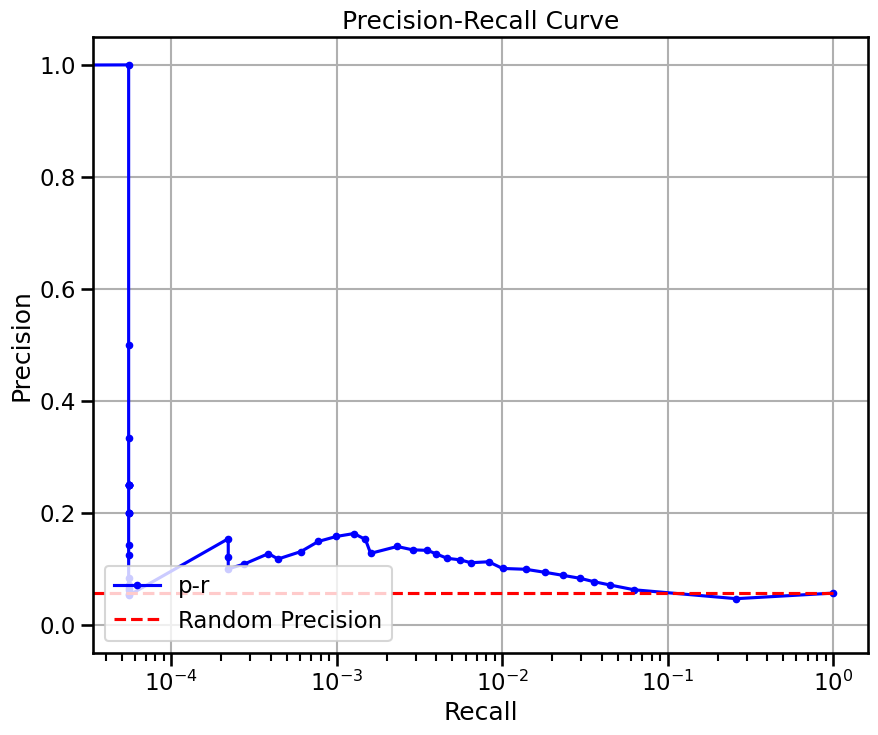

{'precision': 0.04679072544531794,
 'recall': 0.25927763992280123,
 'rand_precision': 0.05675949747422584,
 'auprc': 0.05451899379734963,
 'EPR': 1.120179447134923}

In [23]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=NUM_GENES)
adata.var['ensembl_id'] = adata.var.index
subadata = adata[:1024, adata.var.index.isin(
    model.genes) & adata.var.highly_variable]

genie_grn = compute_genie3(subadata, nthreads=32,
                           regulators=adata.var[adata.var.isTF].index.tolist())
genie_grn.var['symbol'] = make_index_unique(
    genie_grn.var['symbol'].astype(str))
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)
genie_grn = compute_genie3(subadata, nthreads=32)
genie_grn.var.index = genie_grn.var['symbol']
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)

# chen / all


In [24]:
preadata = get_sroy_gt(get="chen", species="human", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 385 renamining
filtered out 0 cells, 385 renamining
Removed 0 genes.
startin QC
Seeing 38 outliers (9.87% of total dataset):
done


(GRnnData object with n_obs × n_vars = 385 × 8595
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 2969 elements,
 19)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 41.10 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.021527474503557943 
recall:  0.9049676025917927 
random precision: 0.01741452589611464


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 2100.67it/s]


Area Under Precision-Recall Curve (AUPRC):  0.020799644921742123
EPR: 0.737384426068595


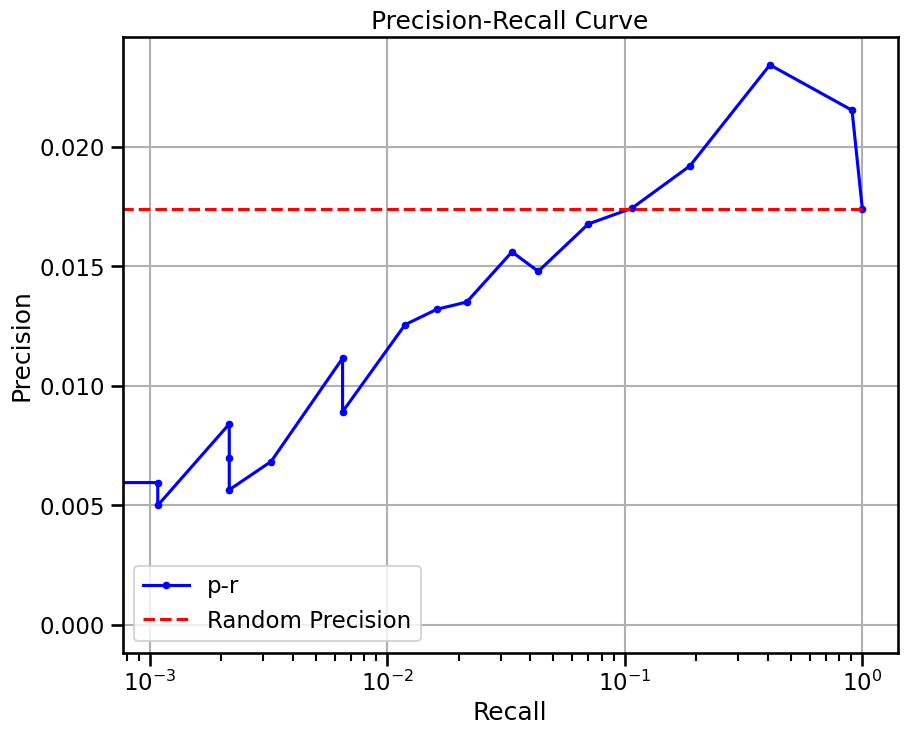

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 61.03 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.01963350785340314 
recall:  0.24298056155507558 
random precision: 0.01741452589611464


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 2182.09it/s]


Area Under Precision-Recall Curve (AUPRC):  0.019266276321108576
EPR: 1.382214738820581


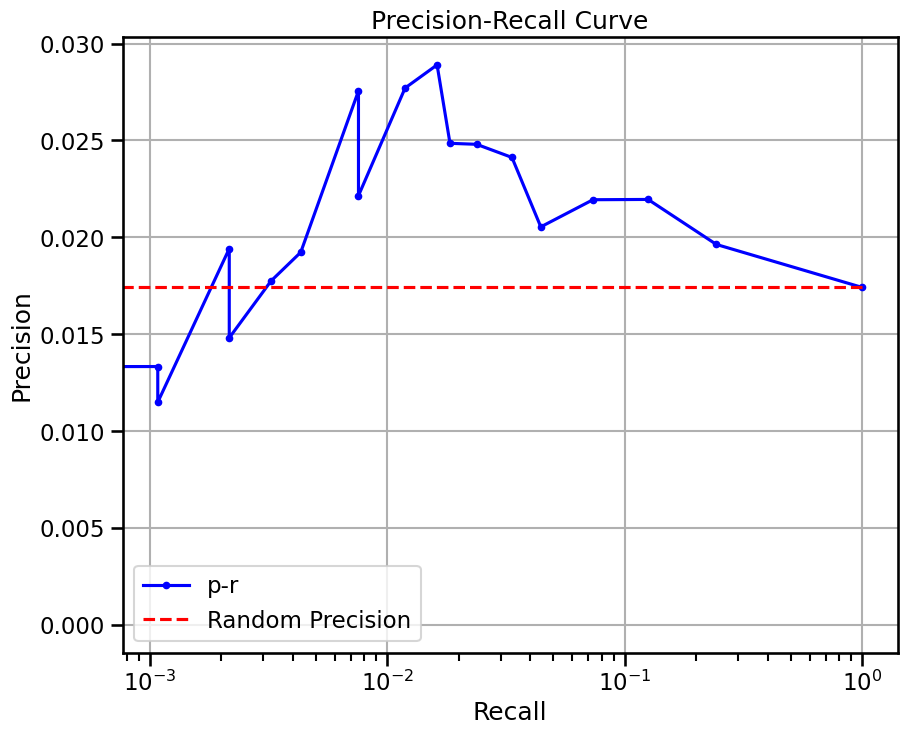

{'precision': 0.01963350785340314,
 'recall': 0.24298056155507558,
 'rand_precision': 0.01741452589611464,
 'auprc': 0.019266276321108576,
 'EPR': 1.382214738820581}

In [25]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=NUM_GENES)
adata.var['ensembl_id'] = adata.var.index
subadata = adata[:1024, adata.var.index.isin(
    model.genes) & adata.var.highly_variable]

genie_grn = compute_genie3(subadata, nthreads=32,
                           regulators=adata.var[adata.var.isTF].index.tolist())
genie_grn.var['symbol'] = make_index_unique(
    genie_grn.var['symbol'].astype(str))
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)
genie_grn = compute_genie3(subadata, nthreads=32)
genie_grn.var.index = genie_grn.var['symbol']
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)

# Duren / all


In [26]:
preadata = get_sroy_gt(get="duren", species="mouse", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.mTF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 464 renamining
filtered out 0 cells, 464 renamining
Removed 0 genes.
startin QC
Seeing 22 outliers (4.74% of total dataset):
done


(GRnnData object with n_obs × n_vars = 464 × 15299
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 7466 elements,
 44)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 101.87 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.0075046904315197 
recall:  0.9555555555555556 
random precision: 0.006053268765133172


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 4579.24it/s]


Area Under Precision-Recall Curve (AUPRC):  0.007855761234964247
EPR: 2.8132720482619935


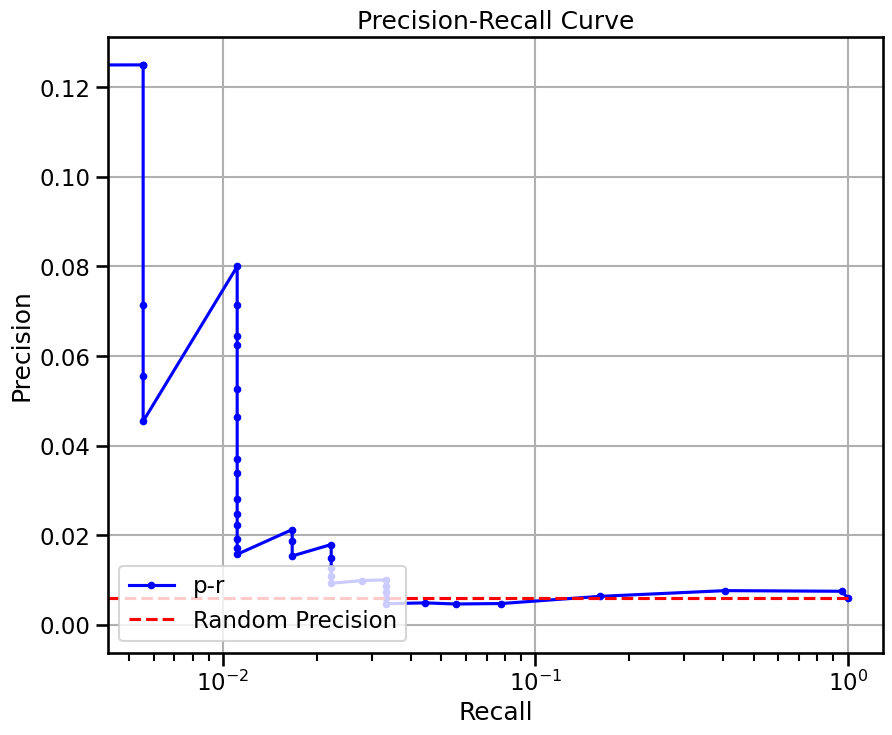

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 304.15 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.006710401121738695 
recall:  0.7444444444444445 
random precision: 0.006053268765133172


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 3325.96it/s]


Area Under Precision-Recall Curve (AUPRC):  0.006870201122522556
EPR: 1.8544375710137608


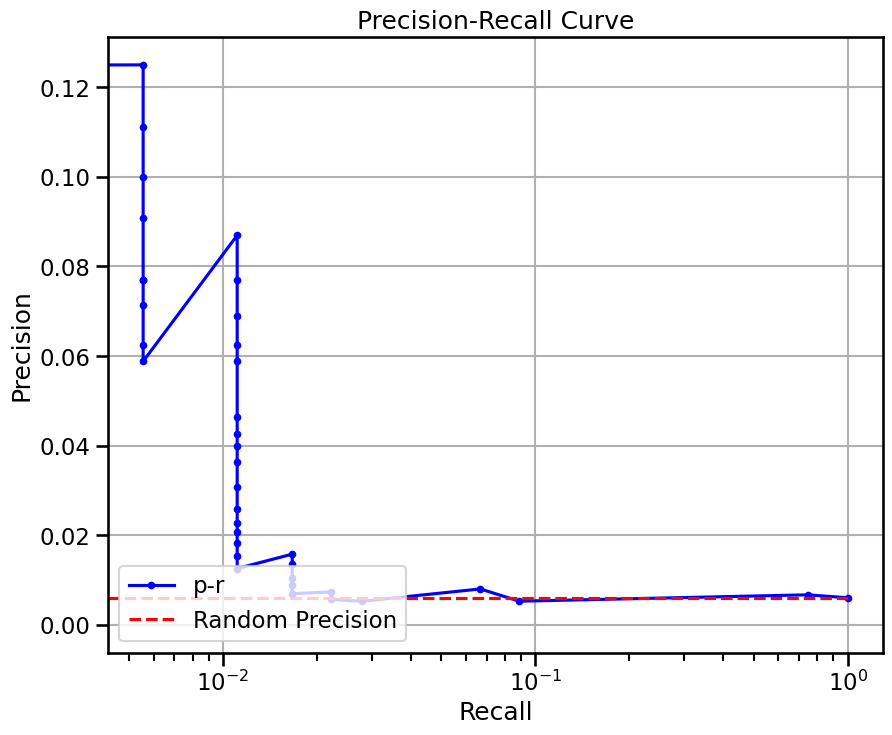

{'precision': 0.006710401121738695,
 'recall': 0.7444444444444445,
 'rand_precision': 0.006053268765133172,
 'auprc': 0.006870201122522556,
 'EPR': 1.8544375710137608}

In [27]:
NUM_GENES = 5000
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=NUM_GENES)
adata.var['ensembl_id'] = adata.var.index
subadata = adata[:1024, adata.var.index.isin(
    model.genes) & adata.var.highly_variable]

genie_grn = compute_genie3(subadata, nthreads=32,
                           regulators=adata.var[adata.var.isTF].index.tolist())
genie_grn.var['symbol'] = make_index_unique(
    genie_grn.var['symbol'].astype(str))
genie_grn.var.index = genie_grn.var['symbol']
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)
genie_grn = compute_genie3(subadata, nthreads=32)
genie_grn.var.index = genie_grn.var['symbol']
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)

# semrau / all


In [28]:
preadata = get_sroy_gt(get="semrau", species="mouse", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.mTF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 384 renamining
filtered out 0 cells, 384 renamining
Removed 0 genes.
startin QC
Seeing 35 outliers (9.11% of total dataset):
done


(GRnnData object with n_obs × n_vars = 384 × 10243
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 4404 elements,
 38)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 46.83 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.013773743800879572 
recall:  0.790547798066595 
random precision: 0.01116507765185585


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1685.75it/s]


Area Under Precision-Recall Curve (AUPRC):  0.014624152305466712
EPR: 1.5582716712950522


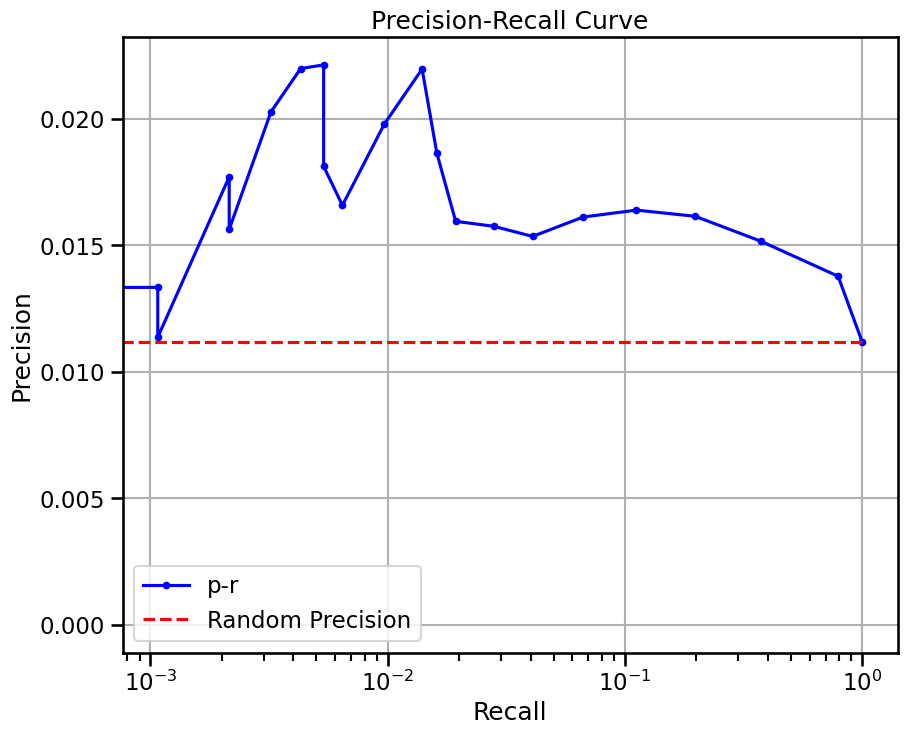

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 79.13 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.012423337002673377 
recall:  0.3394199785177229 
random precision: 0.01116507765185585


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 2360.70it/s]


Area Under Precision-Recall Curve (AUPRC):  0.011770038589045432
EPR: 1.2577878403842777


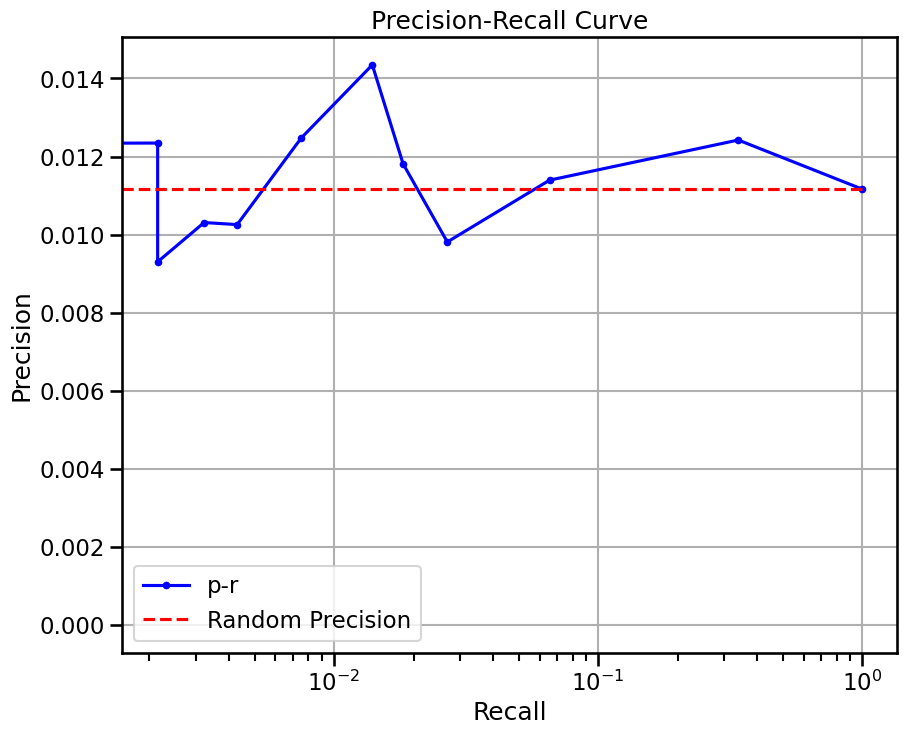

{'precision': 0.012423337002673377,
 'recall': 0.3394199785177229,
 'rand_precision': 0.01116507765185585,
 'auprc': 0.011770038589045432,
 'EPR': 1.2577878403842777}

In [29]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=NUM_GENES)
adata.var['ensembl_id'] = adata.var.index
subadata = adata[:1024, adata.var.index.isin(
    model.genes) & adata.var.highly_variable]

genie_grn = compute_genie3(subadata, nthreads=32,
                           regulators=adata.var[adata.var.isTF].index.tolist())
genie_grn.var['symbol'] = make_index_unique(
    genie_grn.var['symbol'].astype(str))
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)
genie_grn = compute_genie3(subadata, nthreads=32)
genie_grn.var.index = genie_grn.var['symbol']
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)

# semrau / chip


In [30]:
preadata = get_sroy_gt(get="semrau", species="mouse", gt="chip")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.mTF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 384 renamining
filtered out 0 cells, 384 renamining
Removed 0 genes.
startin QC
Seeing 35 outliers (9.11% of total dataset):
done


(GRnnData object with n_obs × n_vars = 384 × 10243
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 94145 elements,
 49)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 44.98 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.2661600898022623 
recall:  0.6751653743374074 
random precision: 0.23269113149847095


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 563.17it/s]


Area Under Precision-Recall Curve (AUPRC):  0.2676376893748219
EPR: 1.3956624920400529


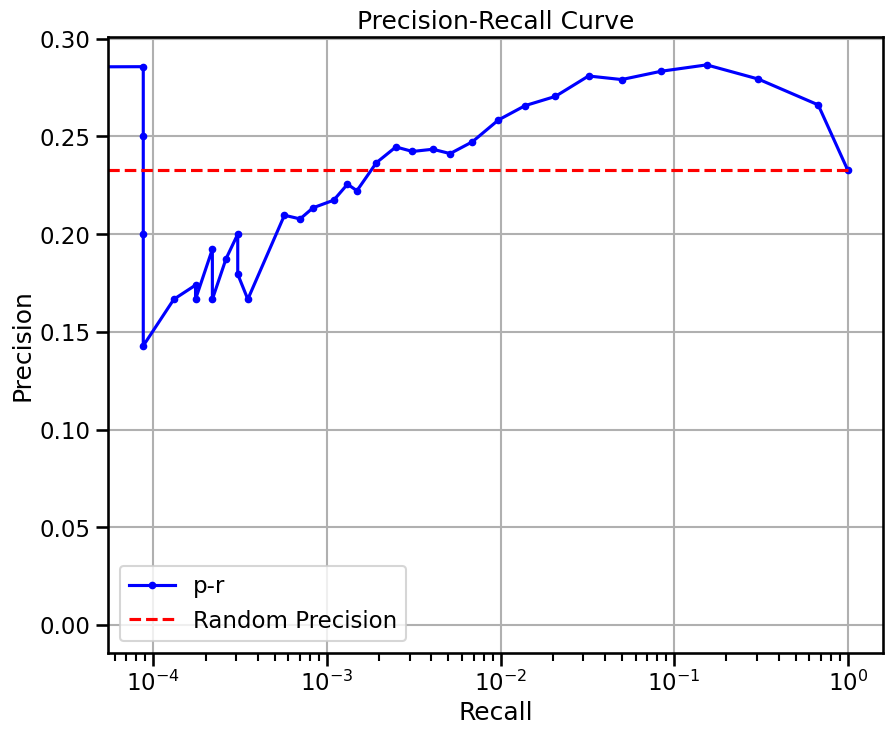

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 79.33 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.23200866340695042 
recall:  0.3097209444955535 
random precision: 0.23269113149847095


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1025.02it/s]


Area Under Precision-Recall Curve (AUPRC):  0.23234347643785389
EPR: 0.9797970877995407


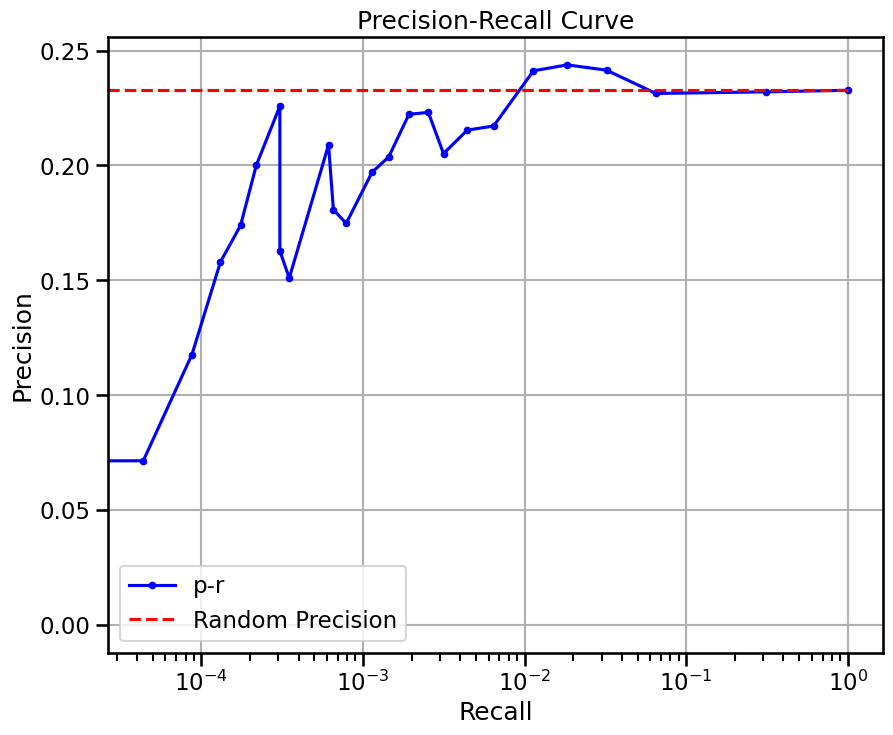

{'precision': 0.23200866340695042,
 'recall': 0.3097209444955535,
 'rand_precision': 0.23269113149847095,
 'auprc': 0.23234347643785389,
 'EPR': 0.9797970877995407}

In [31]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=NUM_GENES)
adata.var['ensembl_id'] = adata.var.index
subadata = adata[:1024, adata.var.index.isin(
    model.genes) & adata.var.highly_variable]

genie_grn = compute_genie3(subadata, nthreads=32,
                           regulators=adata.var[adata.var.isTF].index.tolist())
genie_grn.var['symbol'] = make_index_unique(
    genie_grn.var['symbol'].astype(str))
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)
genie_grn = compute_genie3(subadata, nthreads=32)
genie_grn.var.index = genie_grn.var['symbol']
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)

# semrau / ko


In [32]:
preadata = get_sroy_gt(get="semrau", species="mouse", gt="ko")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.mTF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 384 renamining
filtered out 0 cells, 384 renamining
Removed 0 genes.
startin QC
Seeing 35 outliers (9.11% of total dataset):
done


(GRnnData object with n_obs × n_vars = 384 × 10243
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 39782 elements,
 125)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 44.44 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.034179527345318414 
recall:  0.556281638288081 
random precision: 0.03119840346872263


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
 46%|████▋     | 46/99 [00:00<00:00, 455.44it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 507.02it/s]


Area Under Precision-Recall Curve (AUPRC):  0.03439526310943801
EPR: 1.2651419360664056


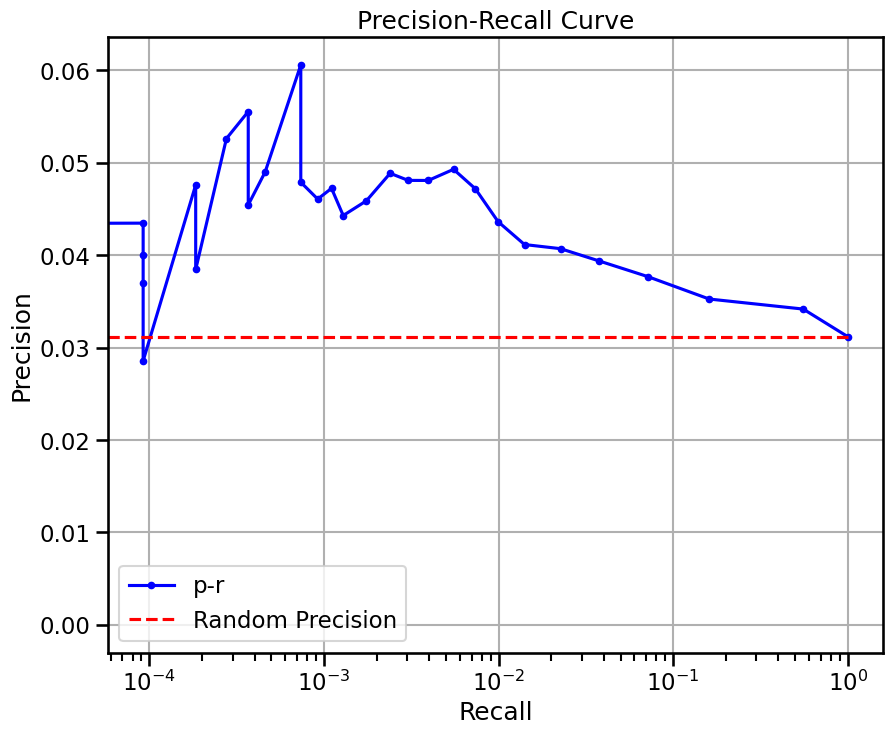

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 79.66 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.02459710830361881 
recall:  0.2431661297745053 
random precision: 0.03119840346872263


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 524.07it/s]


Area Under Precision-Recall Curve (AUPRC):  0.02702568656568299
EPR: 0.7432721561726381


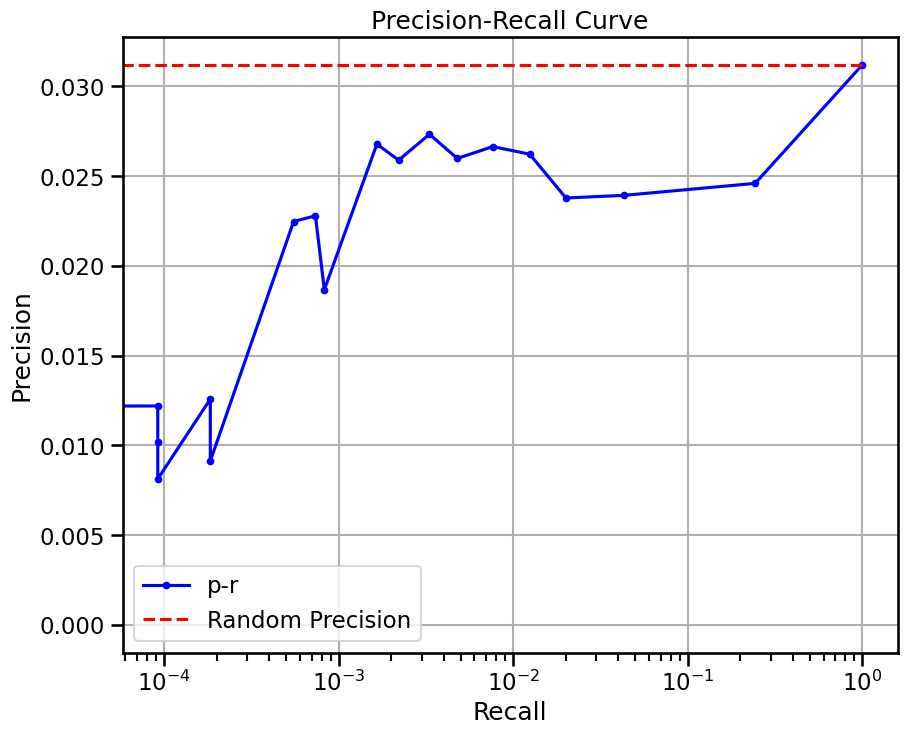

{'precision': 0.02459710830361881,
 'recall': 0.2431661297745053,
 'rand_precision': 0.03119840346872263,
 'auprc': 0.02702568656568299,
 'EPR': 0.7432721561726381}

In [33]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=NUM_GENES)
adata.var['ensembl_id'] = adata.var.index
subadata = adata[:1024, adata.var.index.isin(
    model.genes) & adata.var.highly_variable]

genie_grn = compute_genie3(subadata, nthreads=32,
                           regulators=adata.var[adata.var.isTF].index.tolist())
genie_grn.var['symbol'] = make_index_unique(
    genie_grn.var['symbol'].astype(str))
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)
genie_grn = compute_genie3(subadata, nthreads=32)
genie_grn.var.index = genie_grn.var['symbol']
BenGRN(genie_grn, do_auc=True, doplot=True).compare_to(other=preadata)